<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/NN_wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

red = pd.read_csv('/content/drive/MyDrive/Deep/winequality-red.csv', sep = ';')
print(red.head())
white = pd.read_csv('/content/drive/MyDrive/Deep/winequality-white.csv', sep = ';')
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   


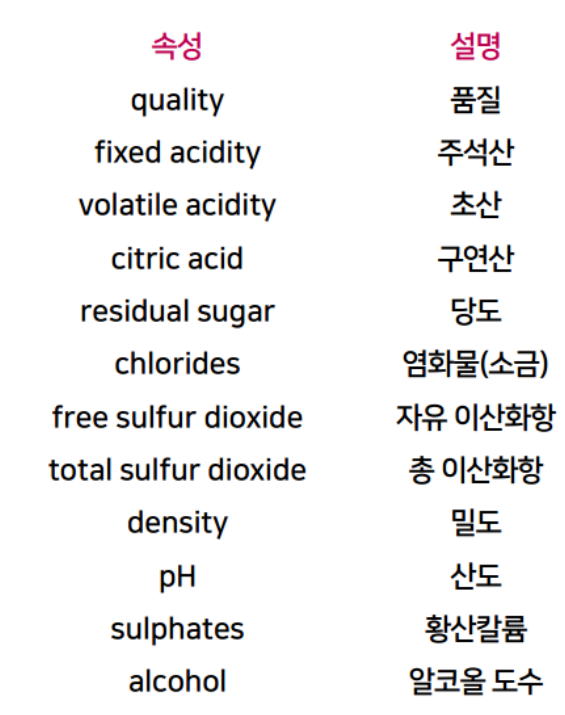

In [ ]:
red['type']   = 0
white['type'] = 1

In [ ]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70         0.00  ...      9.4        5     0
1            7.8              0.88         0.00  ...      9.8        5     0
2            7.8              0.76         0.04  ...      9.8        5     0
3           11.2              0.28         0.56  ...      9.8        6     0
4            7.4              0.70         0.00  ...      9.4        5     0

[5 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1
2            8.1              0.28         0.40  ...     10.1        6     1
3            7.2              0.23         0.32  ...      9.9        6     1
4            7.2              0.23         0.32  ...      9.9        6     1

[5 rows x 13 columns]


In [ ]:
wine = pd.concat([red,white]) #red, white 병합 concat하기
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


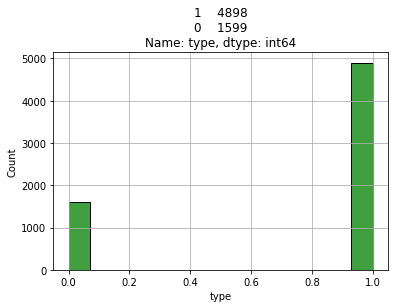

In [ ]:
sns.histplot(wine['type'], color = 'green')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()

In [ ]:
wine_shuffle = wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
2823            7.6              0.27         0.34  ...     12.4        6     1
3270            6.4              0.15         0.29  ...     10.2        5     1
824             8.4              0.18         0.42  ...     11.7        5     1
2093            6.6              0.22         0.53  ...      9.4        5     1
142             7.9              0.21         0.40  ...     10.8        6     1

[5 rows x 13 columns]


In [ ]:
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [ ]:
# 전체데이터 / train_idx 구하기
print('Total Dataset Index : ',len(wine_np))
train_idx = int(len(wine_np) * 0.8)
print('Train Dataset Index : ', train_idx)

Total Dataset Index :  6497
Train Dataset Index :  5197


In [ ]:
train_X , train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X , test_Y = wine_np[train_idx :, :-1], wine_np[train_idx: , -1]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [ ]:
train_Y

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

# Y값 (0),(1)을 one-hot-vector 처리하기 >> ( 0,1 ), ( 1,0 )
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y_to_categorical = tf.keras.utils.to_categorical(test_Y,   num_classes = 2)

train_Y_to_categorical_5 = tf.keras.utils.to_categorical(train_Y, num_classes = 5)
print("===========================================")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

print(train_Y_to_categorical_5[:5])

1.0
1.0
1.0
[0. 1.]
[0. 1.]
[0. 1.]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


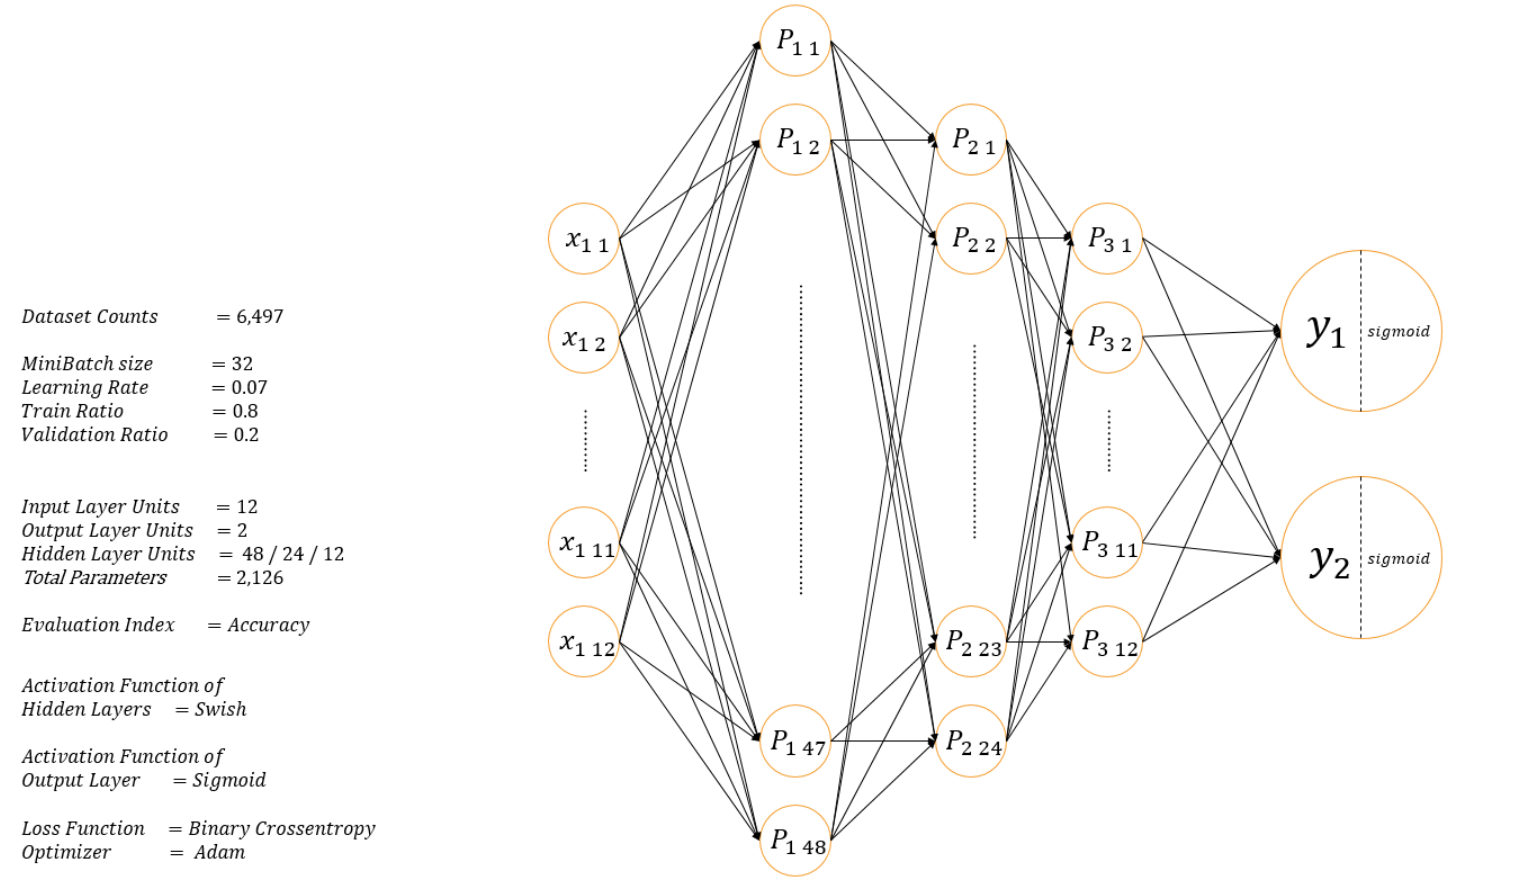

In [ ]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [ ]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model_swish_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs=25, batch_size=32, validation_split=0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
                                                                                monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 4ms/step - loss: 0.6948 - accuracy: 0.8747 - val_loss: 0.1698 - val_accuracy: 0.9442
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9326 - val_loss: 0.1660 - val_accuracy: 0.9481
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9348 - val_loss: 0.2524 - val_accuracy: 0.9519
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9418 - val_loss: 0.1186 - val_accuracy: 0.9635
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9478 - val_loss: 0.1069 - val_accuracy: 0.9644
Epoch 6/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9598 - val_loss: 0.0626 - val_accuracy: 0.9837
Epoch 7/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9324 - val_loss: 0.0867 - val_accuracy: 0.9702
Epoch 

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

In [ ]:
val_loss = history.history['val_loss']
loss     = history.history['loss']

In [ ]:
val_accuracy

[0.9442307949066162,
 0.9480769038200378,
 0.9519230723381042,
 0.9634615182876587,
 0.9644230604171753,
 0.9836538434028625,
 0.9701923131942749,
 0.9644230604171753,
 0.9721153974533081,
 0.982692301273346,
 0.9903846383094788,
 0.9711538553237915,
 0.9846153855323792,
 0.9711538553237915,
 0.9855769276618958,
 0.7471153736114502,
 0.9807692170143127,
 0.987500011920929]

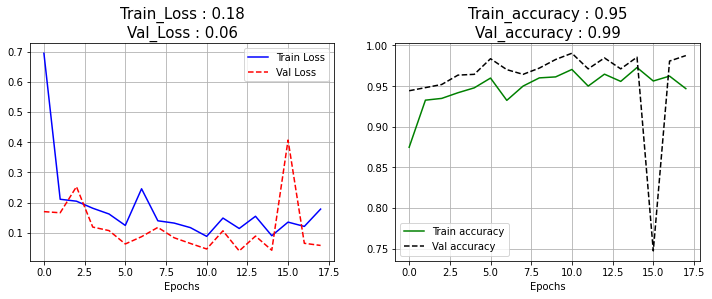

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')

plt.xlabel('Epochs')
plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()


plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'g-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val accuracy')

plt.xlabel('Epochs')
plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.show()


In [36]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9854


[0.06121757999062538, 0.9853846430778503]

In [37]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20] ,2))

[[0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]
 [1.   0.  ]
 [0.03 0.98]
 [1.   0.  ]
 [0.98 0.02]
 [0.01 0.99]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.05 0.95]
 [0.01 0.99]
 [0.04 0.96]
 [0.01 0.99]
 [0.19 0.81]
 [0.98 0.02]]


In [38]:
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [39]:
print(test_Y_to_categorical[:20])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [40]:
model_swish_sigmoid.save('model_swish_sigmoid.h5')